In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
%matplotlib inline

In [2]:
def readValues(filename):
    values = []
    with open(filename) as csvfile:
        next(csvfile) #skip header
        reader = csv.reader(csvfile, delimiter=' ')
        for row in reader:
            values = [float(element) for element in row]
    return(values)

In [3]:
def readValues_modified(filename):
    values = []
    with open(filename) as csvfile:
        next(csvfile) #skip header
        reader = csv.reader(csvfile, delimiter=' ')
        for element in reader:
            values.append(float(element[0]))
    return(values)

In [9]:
def get_dirs_list(directory):
    subdirs = next(os.walk(directory))[1]
    dirs = []
    for subdir in subdirs:
        #vsg = subdir[4:-18]
        #dirs.append((vsg, directory + subdir + '/data.csv'))
        dirs.append(directory + subdir + '/data.csv')
    return(sorted(dirs))

In [5]:
def get_dirs(directory):
    subdirs = next(os.walk(directory))[1]
    for subdir in subdirs:
        vsg = subdir[4:-18]
        yield((vsg, directory + subdir + '/data.csv'))

In [16]:
def read_imag_values(file):
    result = []
    with open(file) as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        for row in reader:
            result.append([float(element) for element in row])
    return(result)

In [70]:
def transform_to_density(B, Ic, x_values):
    phi0 = 2.067e-15 #in T*m**2
    L = 1.0e-6 #in m,total length, including London
    omega = 2 * np.pi * L / phi0
    dB = B[1] - B[0]
    Jx_values = []
    for x in x_values:
        #print(x)
        Jx_real = 0
        Jx_imag = 0
        for k, b in enumerate(B):
            Ic_real = Ic[k] #Fourier coefficient
            #Ic_imag = ?
            Jx_real += Ic_real * np.cos(omega * b * x) * dB #ignoring imaginary part
            Jx_imag += - Ic_real * np.sin(omega * b * x) * dB
        Jx_abs = np.sqrt(Jx_real**2 + Jx_imag**2)
        Jx_values.append(Jx_abs)
    return(Jx_values)
            

In [1]:
testfile = '/users/tkm/kanilmaz/thesis/code/testdata.csv'

In [27]:
values = np.asarray(read_imag_values(testfile)).T

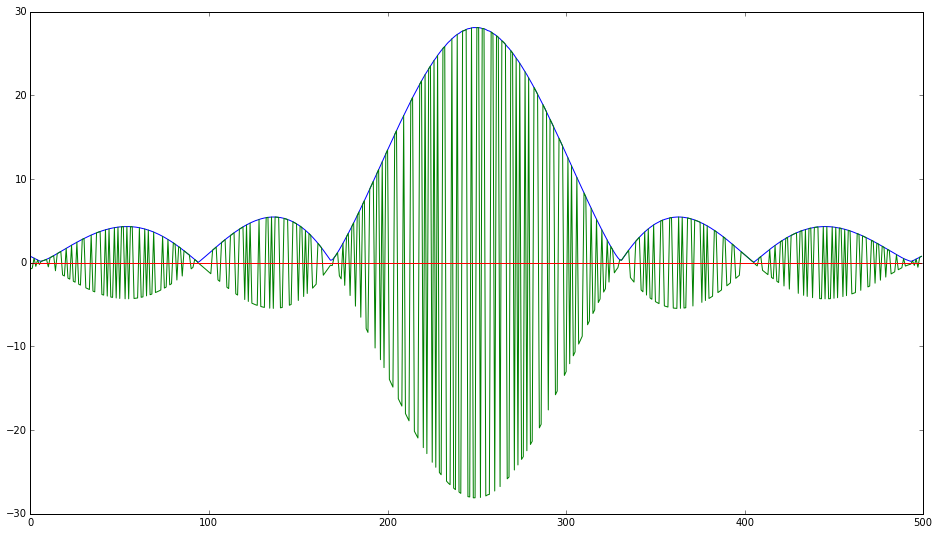

In [33]:
fig, ax = plt.subplots(figsize=(16,9))
for index in range(len(values)):
    ax.plot(values[index])

In [76]:
get_dirs_list(directory)[2:][0]

'/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.1-20171016-17:03:12/data.csv'

In [77]:
current = readValues(get_dirs_list(directory)[2:][0])
magnetic_field = np.linspace(-9e-05, 9e-05, 500)

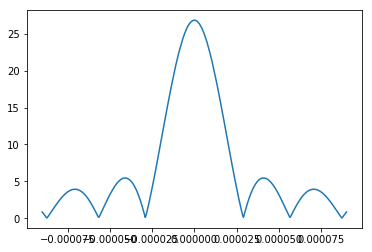

In [78]:
plt.plot(magnetic_field, current,)

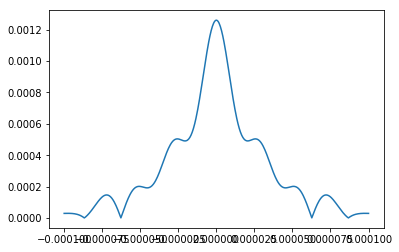

In [82]:
max_x = 1e-4
x = np.linspace(-max_x, max_x, 500)
plt.plot(x, transform_to_density(B=magnetic_field, Ic=current, x_values=x))

# Supercurrent Plots

#### plots for experiment3, short channel

In [29]:
directory = '/home/nefta/thesis/results/wg3_2/supercurrent/'

In [18]:
maxB = 9e-05
mag_field = np.linspace(-maxB, maxB, 500)

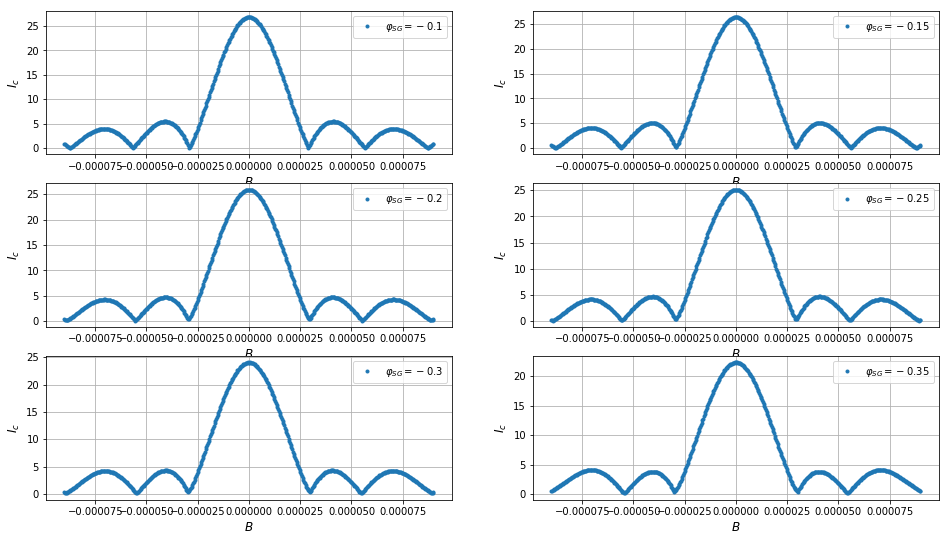

In [32]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    offset = 0
    n = 321 + i
    ax = fig.add_subplot(n)
    files = get_dirs_list(directory)[2:]
    current_values = readValues(files[i + offset ][1])
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(files[i + offset][0]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')

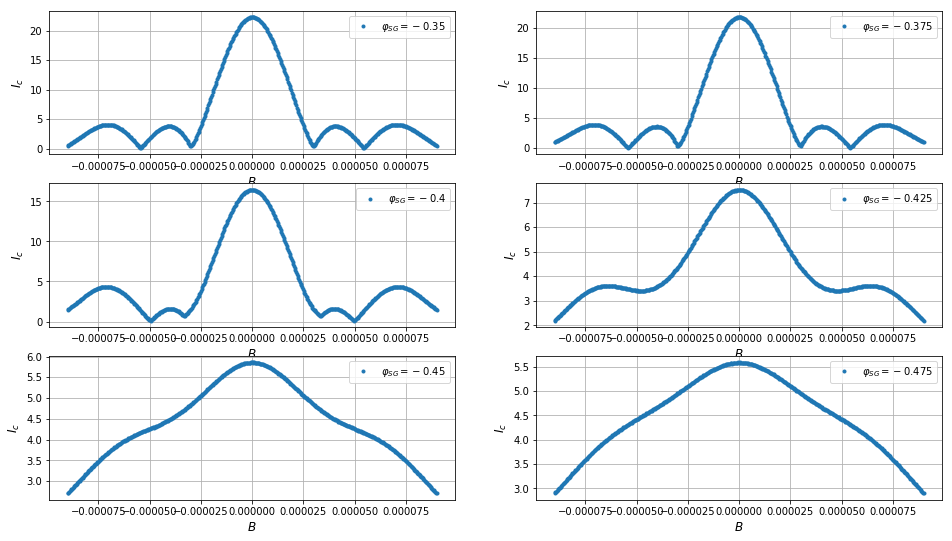

In [34]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    offset = 5
    n = 321 + i
    ax = fig.add_subplot(n)
    files = get_dirs_list(directory)[2:]
    current_values = readValues(files[i + offset ][1])
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(files[i + offset][0]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')

#### plots for experiment 3, long channel

In [24]:
directory = '/home/nefta/thesis/results/wg3_1_small/supercurrent/new/'

In [25]:
maxB = 9e-05
mag_field = np.linspace(-maxB, maxB, 500)

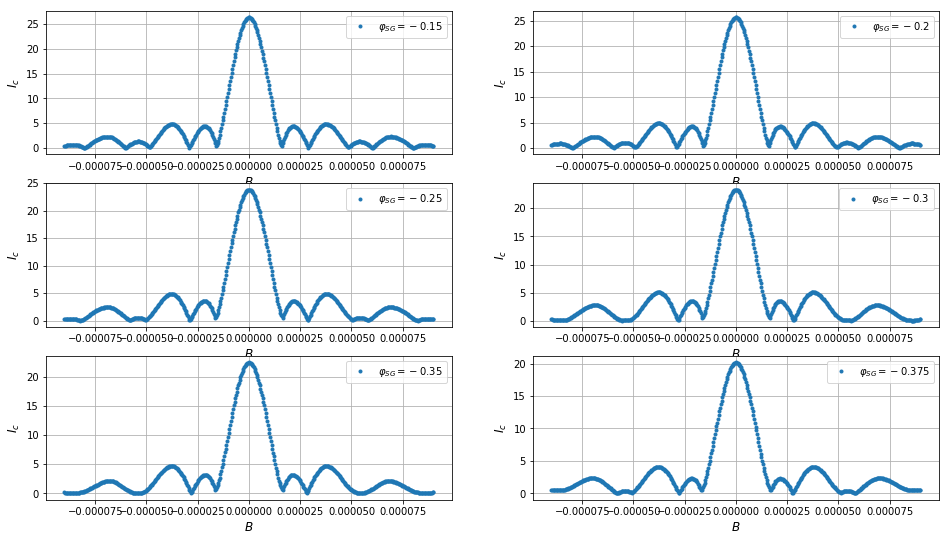

In [26]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    offset = 0
    n = 321 + i
    ax = fig.add_subplot(n)
    files = get_dirs_list(directory)[1:]
    current_values = readValues(files[i + offset ][1])
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(files[i + offset][0]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')


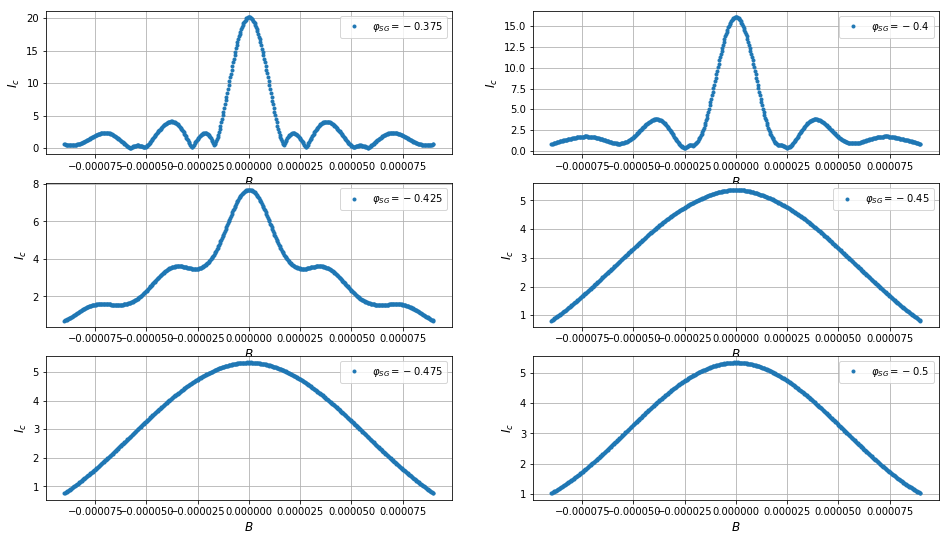

In [28]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    offset = 6
    n = 321 + i
    ax = fig.add_subplot(n)
    files = get_dirs_list(directory)
    current_values = readValues(files[i + offset ][1])
    ax.plot(mag_field, current_values, linestyle='None',
             marker='.', label=r'$\varphi_{{SG}} = {0}$'.format(files[i + offset][0]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$B$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')
